In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.** Simulate a data set using the following python code:

X, y = make_blobs(n_samples=100,
n_features=2,
centers=5,
cluster_std=1,
shuffle=True,
random_state=1)

The make_blobs function can be accessed from sklearn.datasets. X contains the features and y the cluster number.

a. Perform an agglomerative cluster analysis. How many clusters would you
recommend? Justify your answer.

b. Increase the number of features to 10? How many clusters would you recommend?
Justify your answer.

c. What can you conclude from the results in a) and b).

d. Plot your cluster results in a scatter plot for both data sets. Comment on it.

**2.** Analise the simulated data generated in question through K-means.

a. How many clusters would you recommend when there are 2 features? Justify your
answer.

b. How many clusters would you recommend when there are 10 features? Justify your answer.

c. What can you conclude from the results in a) and b).

d. Plot your cluster results in a scatter plot for both data sets. Comment on it.

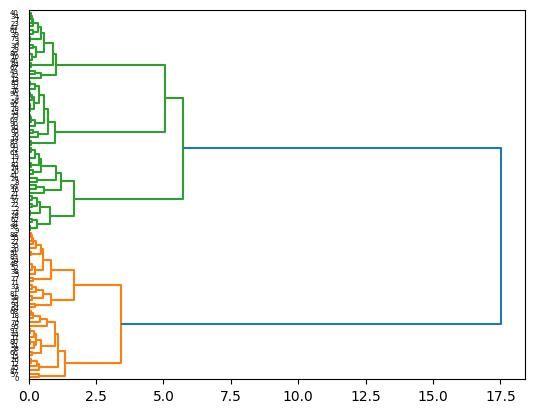

In [46]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=5, cluster_std=1, shuffle=True, random_state=1)

#print(X)
#print(y)

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
#X = df.iloc[:,[10,11,12,13]];
scaler = StandardScaler();
fitted = scaler.fit(X)
X_std_2f = pd.DataFrame(fitted.transform(X));

#First, we produce the dendogram to determine the number of clusters
from scipy.cluster.hierarchy import dendrogram, linkage;
dendrogram(linkage(X_std_2f, method="ward"), orientation = "right",labels = None);

#k=3 or 5 when feature=2


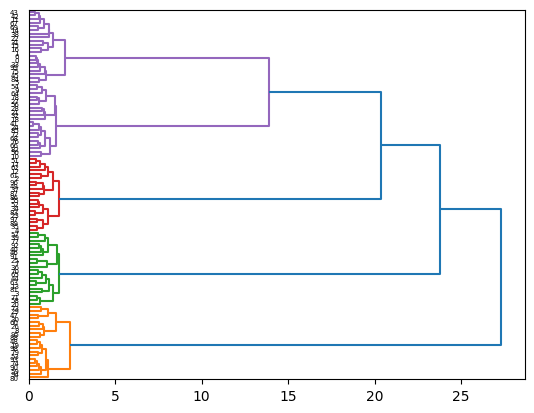

In [47]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=10, centers=5, cluster_std=1, shuffle=True, random_state=1)

#print(X)
#print(y)

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler();
fitted = scaler.fit(X)
X_std_10f = pd.DataFrame(fitted.transform(X));

#First, we produce the dendogram to determine the number of clusters
from scipy.cluster.hierarchy import dendrogram, linkage;
dendrogram(linkage(X_std_10f, method="ward"), orientation = "right",labels = None);

#k = 2 or 5 when feature=2
#k = 5 when feature=10

# feature/ *3


Variability explained by first 2 PCs:  0.71


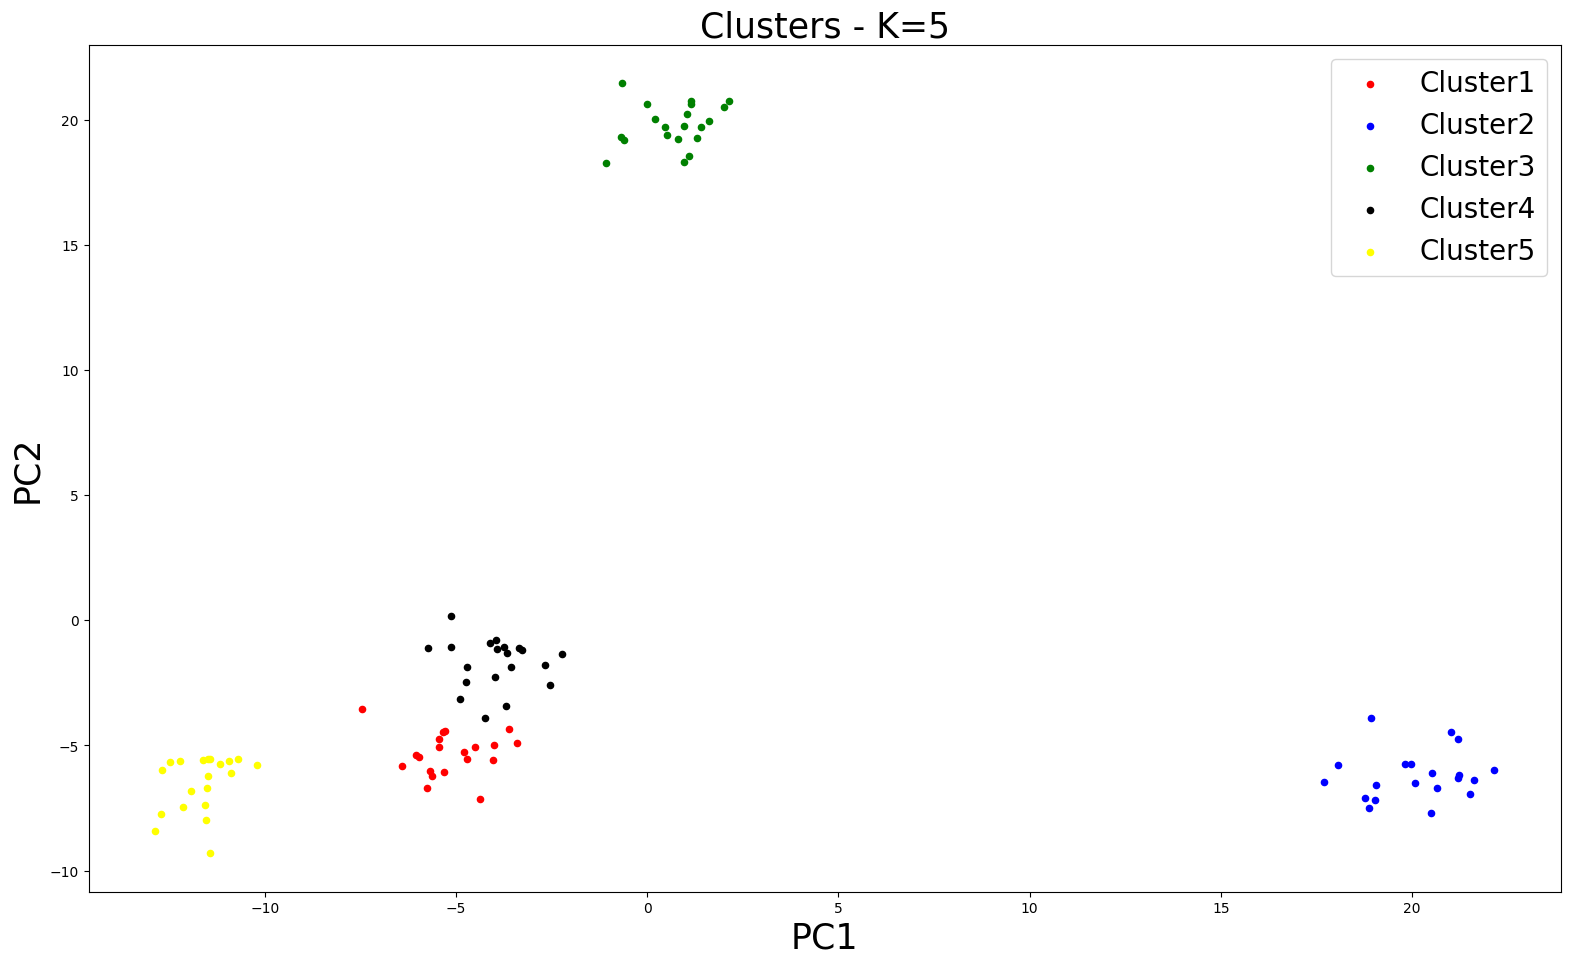

In [60]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

pca = PCA(n_components=2);
principalComponents = pca.fit_transform(X);
print("Variability explained by first 2 PCs: ", round(np.sum(pca.explained_variance_ratio_),2))
PCs = pd.DataFrame(data = principalComponents, columns = ["PC1", "PC2"]);
#model = KMeans(n_clusters = 5, init = "k-means++", random_state = 42);
model = AgglomerativeClustering(n_clusters=5, linkage="ward", compute_distances=True)
y_model = model.fit_predict(X);

# Plotting PCs
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
plt.scatter(PCs.iloc[y_model == 0, 0], PCs.iloc[y_model == 0, 1], s=20, c="red", label = "Cluster1");
plt.scatter(PCs.iloc[y_model == 1, 0], PCs.iloc[y_model == 1, 1], s=20, c="blue", label = "Cluster2");
plt.scatter(PCs.iloc[y_model == 2, 0], PCs.iloc[y_model == 2, 1], s=20, c="green", label = "Cluster3");
plt.scatter(PCs.iloc[y_model == 3, 0], PCs.iloc[y_model == 3, 1], s=20, c="black", label = "Cluster4");
plt.scatter(PCs.iloc[y_model == 4, 0], PCs.iloc[y_model == 4, 1], s=20, c="yellow", label = "Cluster5");

plt.xlabel("PC1", fontsize = 25);
plt.ylabel("PC2", fontsize = 25);
ax.set_title("Clusters - K=5", fontsize = 25);
plt.legend(fontsize = 20);
plt.show();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

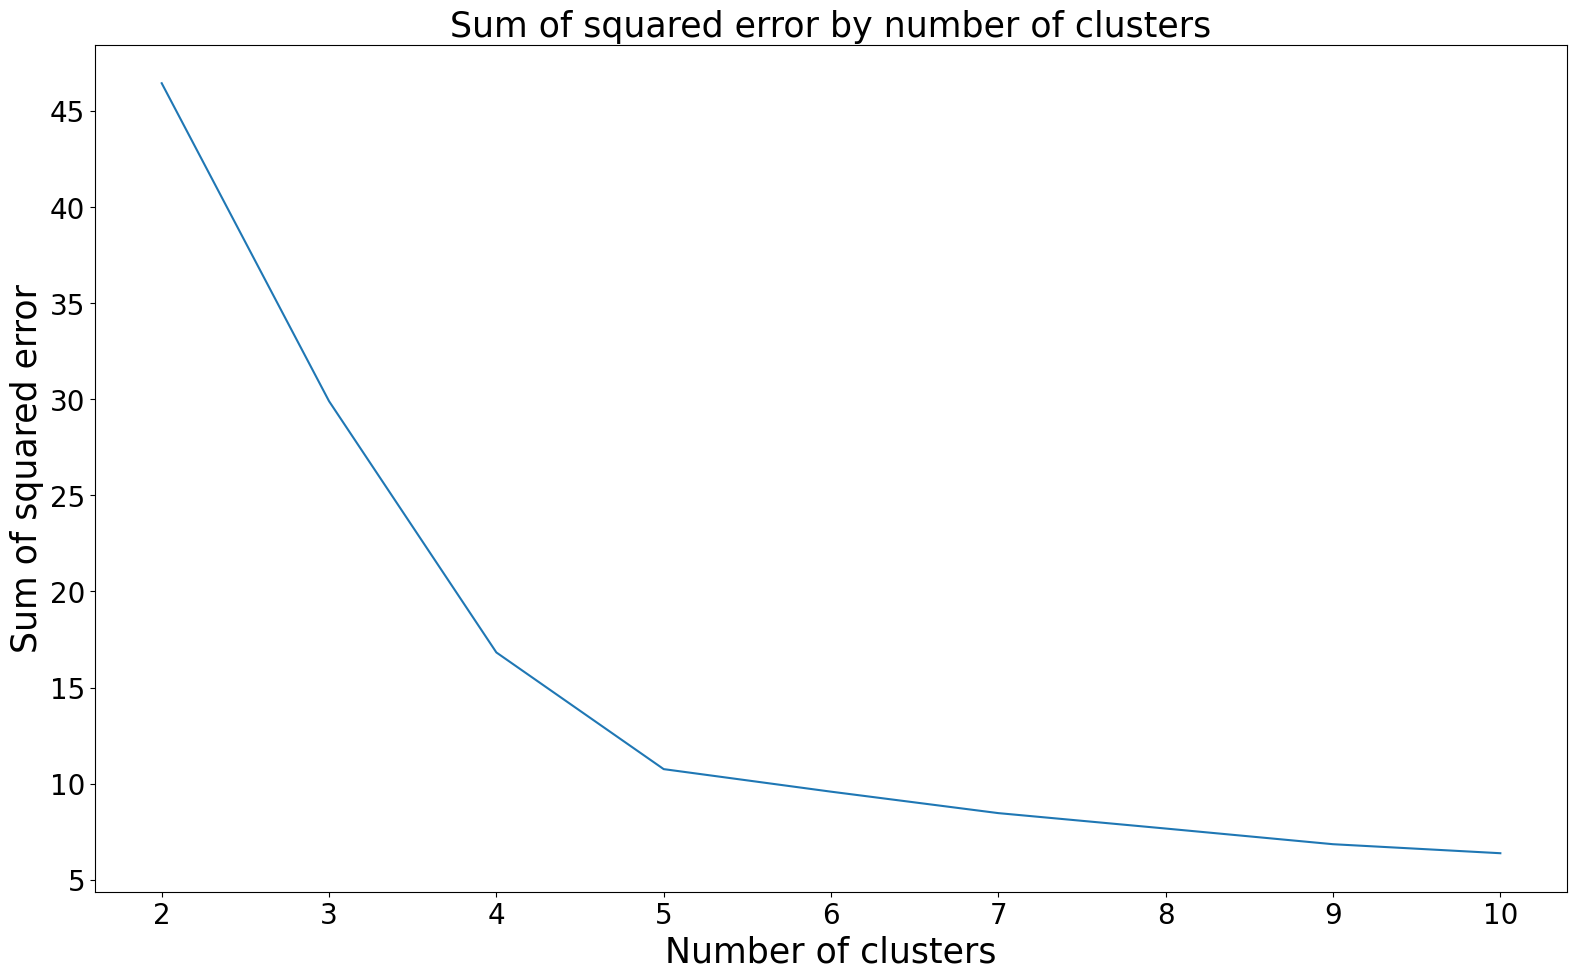

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

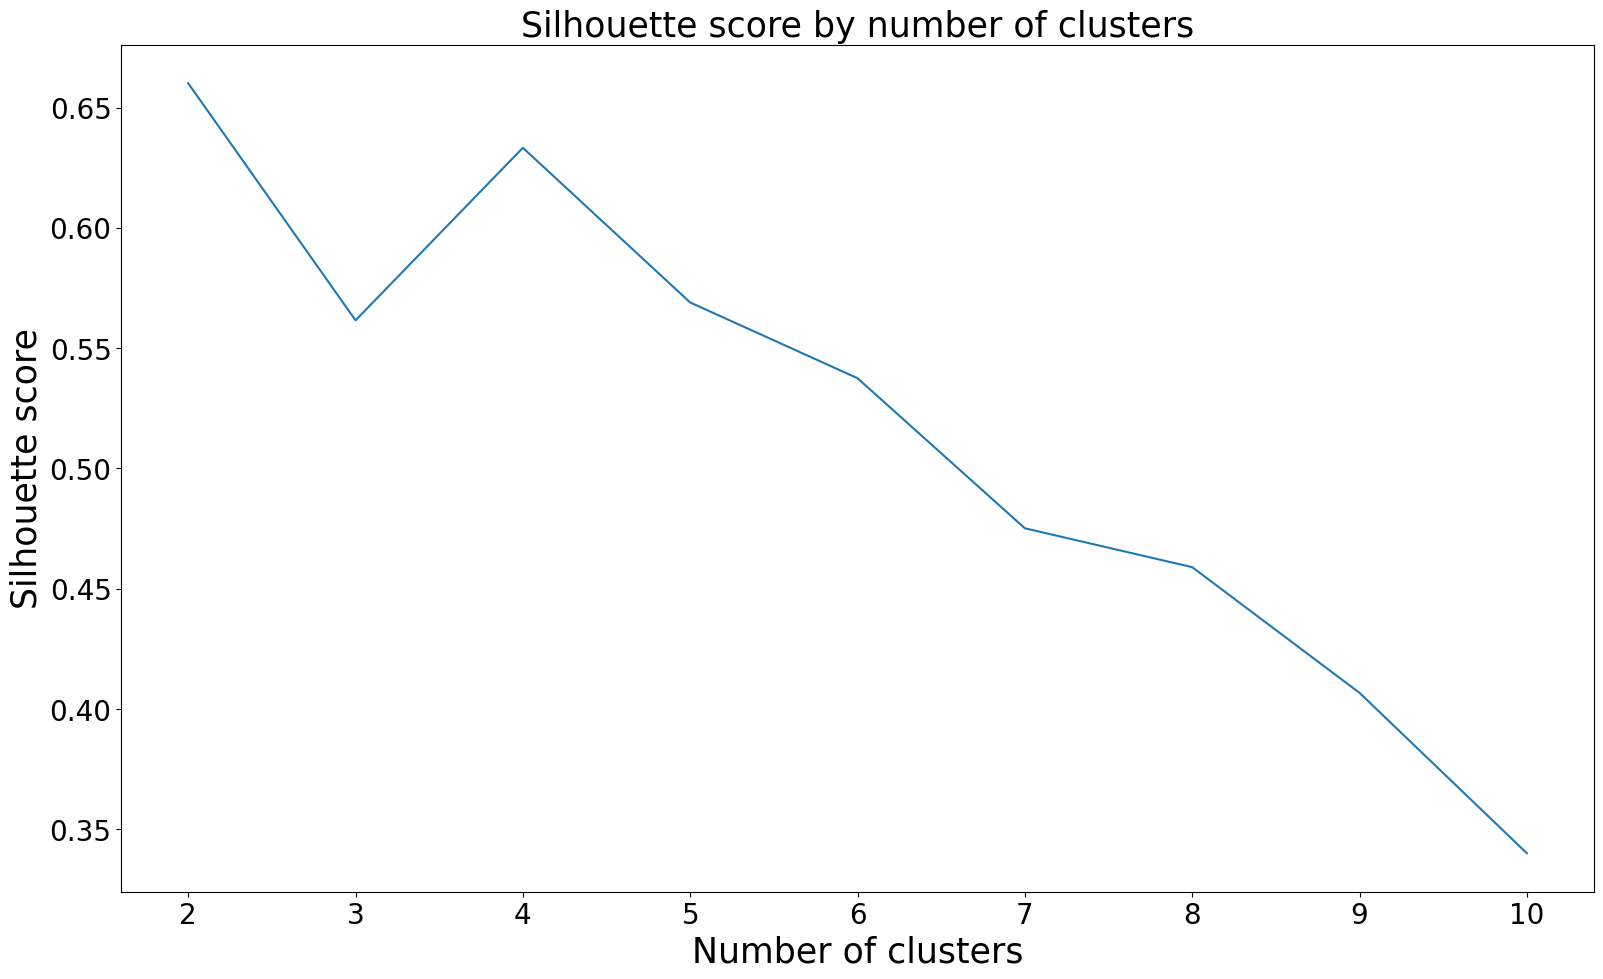

In [50]:
#2.a. How many clusters would you recommend when there are 2 features? Justify your answer.

#Elbow method.
from sklearn.cluster import KMeans
def wcss(x, kmax):
  wcss_s = []
  for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k);
    kmeans.fit(x);
    wcss_s.append(kmeans.inertia_);# sample distances to closest cluster center
  return wcss_s
# Plot
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
kmax = 10; # maximum number of clusters
ax.plot(range(2, kmax + 1), wcss(X_std_2f, kmax));
ax.tick_params(axis="both", which="major", labelsize=20);
ax.set_xlabel("Number of clusters", fontsize = 25);
ax.set_ylabel("Sum of squared error", fontsize = 25);
ax.set_title("Sum of squared error by number of clusters", fontsize = 25);
plt.show();

#Silhouette score.
from sklearn.metrics import silhouette_score
def Silhouette(x, kmax):
  sil = []
  for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(x)
    sil.append(silhouette_score(x, kmeans.labels_, metric = "euclidean"))
  return sil
# Plot
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
ax.plot(range(2,kmax+1), Silhouette(X_std_2f,kmax));
ax.tick_params(axis="both", which="major", labelsize=20);
ax.set_xlabel("Number of clusters", fontsize = 25);
ax.set_ylabel("Silhouette score", fontsize = 25);
ax.set_title("Silhouette score by number of clusters", fontsize = 25);
plt.show();

# k=3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

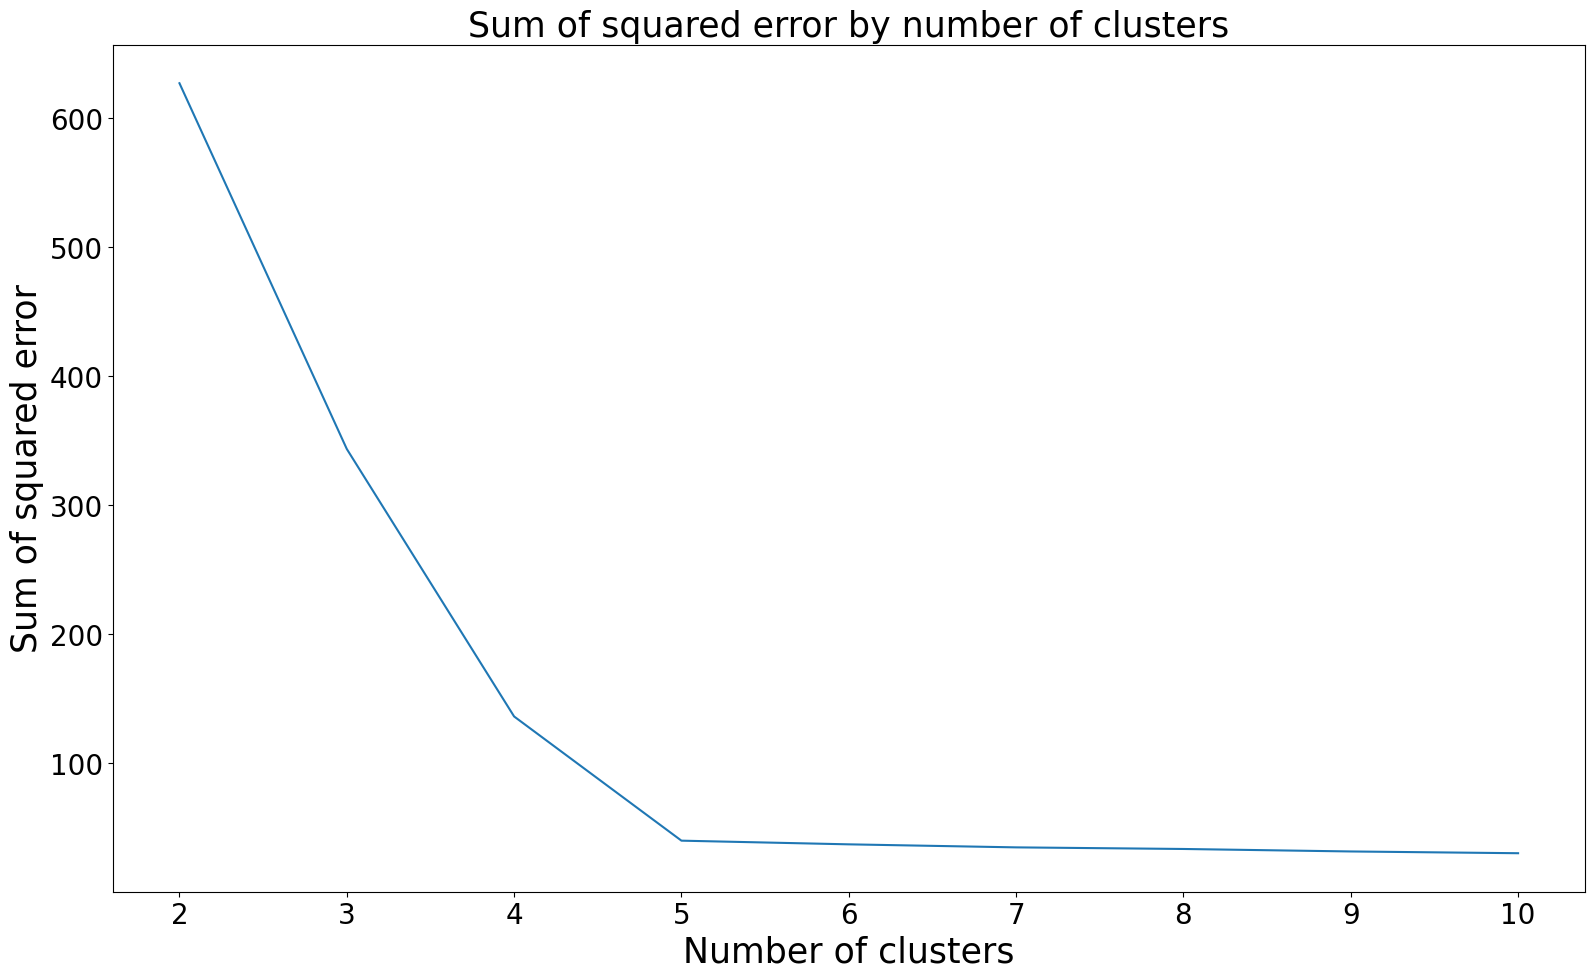

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

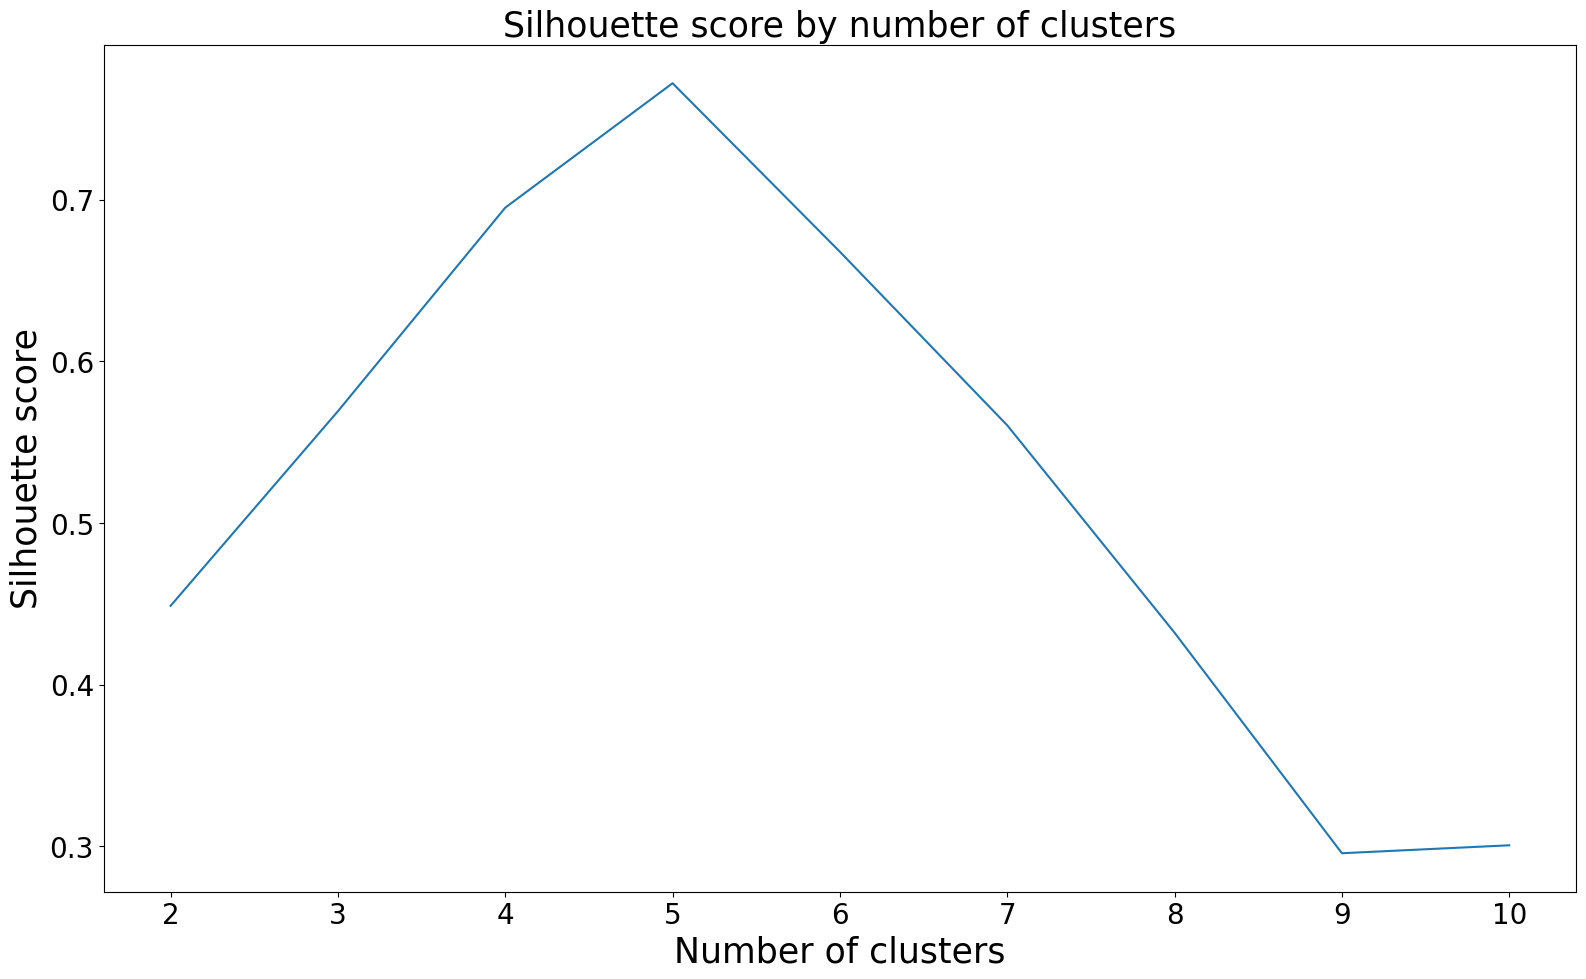

In [57]:
#2.a. How many clusters would you recommend when there are 2 features? Justify your answer.

#Elbow method.
from sklearn.cluster import KMeans
def wcss(x, kmax):
  wcss_s = []
  for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k);
    kmeans.fit(x);
    wcss_s.append(kmeans.inertia_);# sample distances to closest cluster center
  return wcss_s
# Plot
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
kmax = 10; # maximum number of clusters
ax.plot(range(2, kmax + 1), wcss(X_std_10f, kmax));
ax.tick_params(axis="both", which="major", labelsize=20);
ax.set_xlabel("Number of clusters", fontsize = 25);
ax.set_ylabel("Sum of squared error", fontsize = 25);
ax.set_title("Sum of squared error by number of clusters", fontsize = 25);
plt.show();

#Silhouette score.
from sklearn.metrics import silhouette_score
def Silhouette(x, kmax):
  sil = []
  for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(x)
    sil.append(silhouette_score(x, kmeans.labels_, metric = "euclidean"))
  return sil
# Plot
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
ax.plot(range(2,kmax+1), Silhouette(X_std_10f,kmax));
ax.tick_params(axis="both", which="major", labelsize=20);
ax.set_xlabel("Number of clusters", fontsize = 25);
ax.set_ylabel("Silhouette score", fontsize = 25);
ax.set_title("Silhouette score by number of clusters", fontsize = 25);
plt.show();

# k=6,10

Variability explained by first 2 PCs:  0.71


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


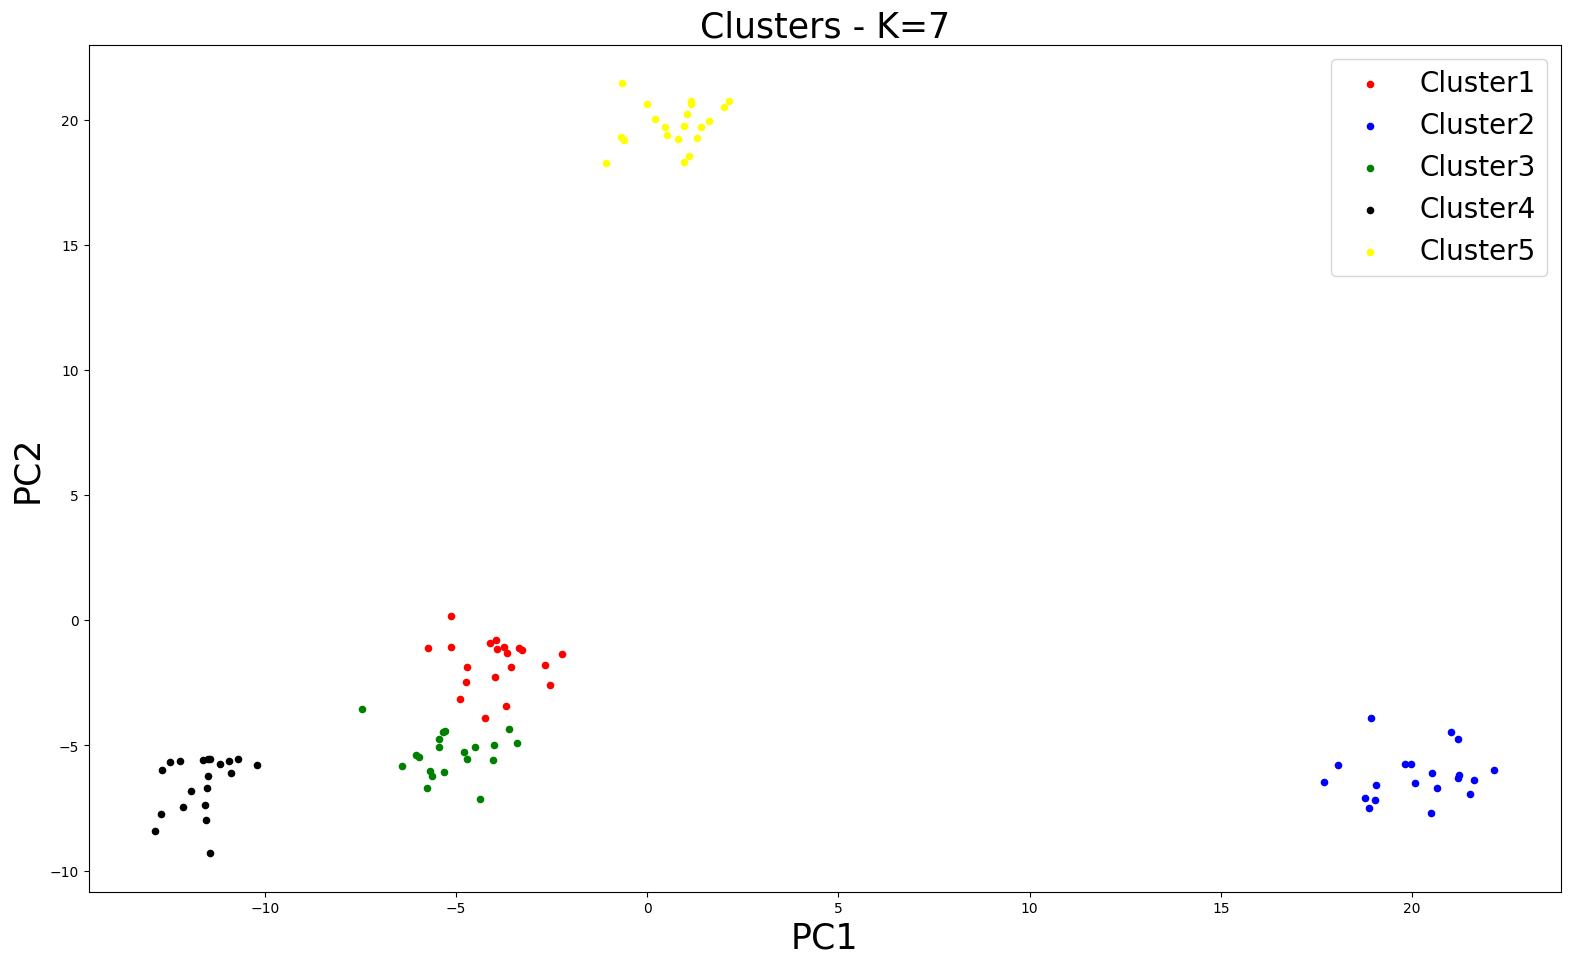

In [59]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2);
principalComponents = pca.fit_transform(X);
print("Variability explained by first 2 PCs: ", round(np.sum(pca.explained_variance_ratio_),2))
PCs = pd.DataFrame(data = principalComponents, columns = ["PC1", "PC2"]);
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42);
y_kmeans = kmeans.fit_predict(X);

# Plotting PCs
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
plt.scatter(PCs.iloc[y_kmeans == 0, 0], PCs.iloc[y_kmeans == 0, 1], s=20, c="red", label = "Cluster1");
plt.scatter(PCs.iloc[y_kmeans == 1, 0], PCs.iloc[y_kmeans == 1, 1], s=20, c="blue", label = "Cluster2");
plt.scatter(PCs.iloc[y_kmeans == 2, 0], PCs.iloc[y_kmeans == 2, 1], s=20, c="green", label = "Cluster3");
plt.scatter(PCs.iloc[y_kmeans == 3, 0], PCs.iloc[y_kmeans == 3, 1], s=20, c="black", label = "Cluster4");
plt.scatter(PCs.iloc[y_kmeans == 4, 0], PCs.iloc[y_kmeans == 4, 1], s=20, c="yellow", label = "Cluster5");

plt.xlabel("PC1", fontsize = 25);
plt.ylabel("PC2", fontsize = 25);
ax.set_title("Clusters - K=5", fontsize = 25);
plt.legend(fontsize = 20);
plt.show();